In [96]:
import pandas as pd
bike = pd.read_csv('~/aiffel/bike_regression/data/bike-sharing-demand/train.csv')

In [97]:
bike.head() # 자전거 대여 데이터

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [98]:
# 자전거를 대여한 datetime을 연, 월, 일, 시, 분, 초의 각 컬럼으로 나누기
bike['datetime'] = train['datetime'].astype('datetime64[ns]')
bike['year'] = train.datetime.dt.year
bike['month'] = train.datetime.dt.month
bike['day'] = train.datetime.dt.day
bike['hour'] = train.datetime.dt.hour
bike['minute'] = train.datetime.dt.minute
bike['second'] = train.datetime.dt.second

<AxesSubplot:xlabel='second', ylabel='count'>

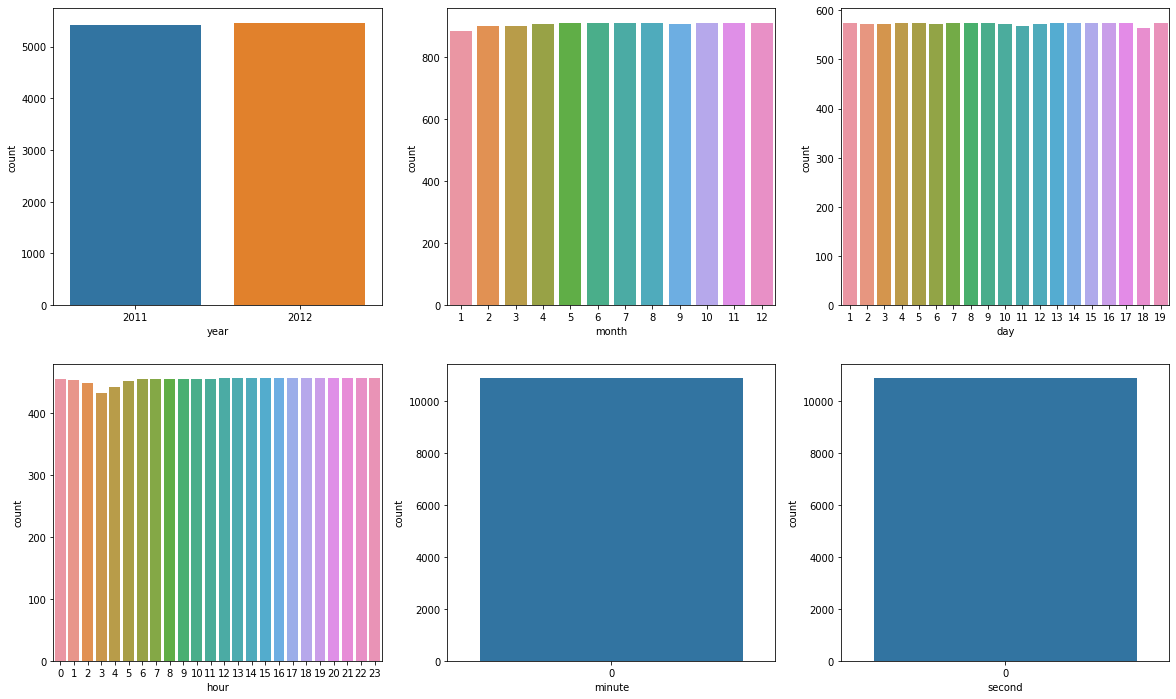

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,12))  
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)

sns.countplot(x='year', data=train, ax=ax1)  #연 데이터의 개수
sns.countplot(x='month', data=train, ax=ax2) #월 데이터의 개수
sns.countplot(x='day', data=train, ax=ax3)   #일 데이터의 개수
sns.countplot(x='hour', data=train, ax=ax4)  # 시 데이터의 개수
sns.countplot(x='minute', data=train, ax=ax5)# 분 데이터의 개수
sns.countplot(x='second', data=train, ax=ax6)# 초 데이터의 개수

<AxesSubplot:xlabel='hour', ylabel='count'>

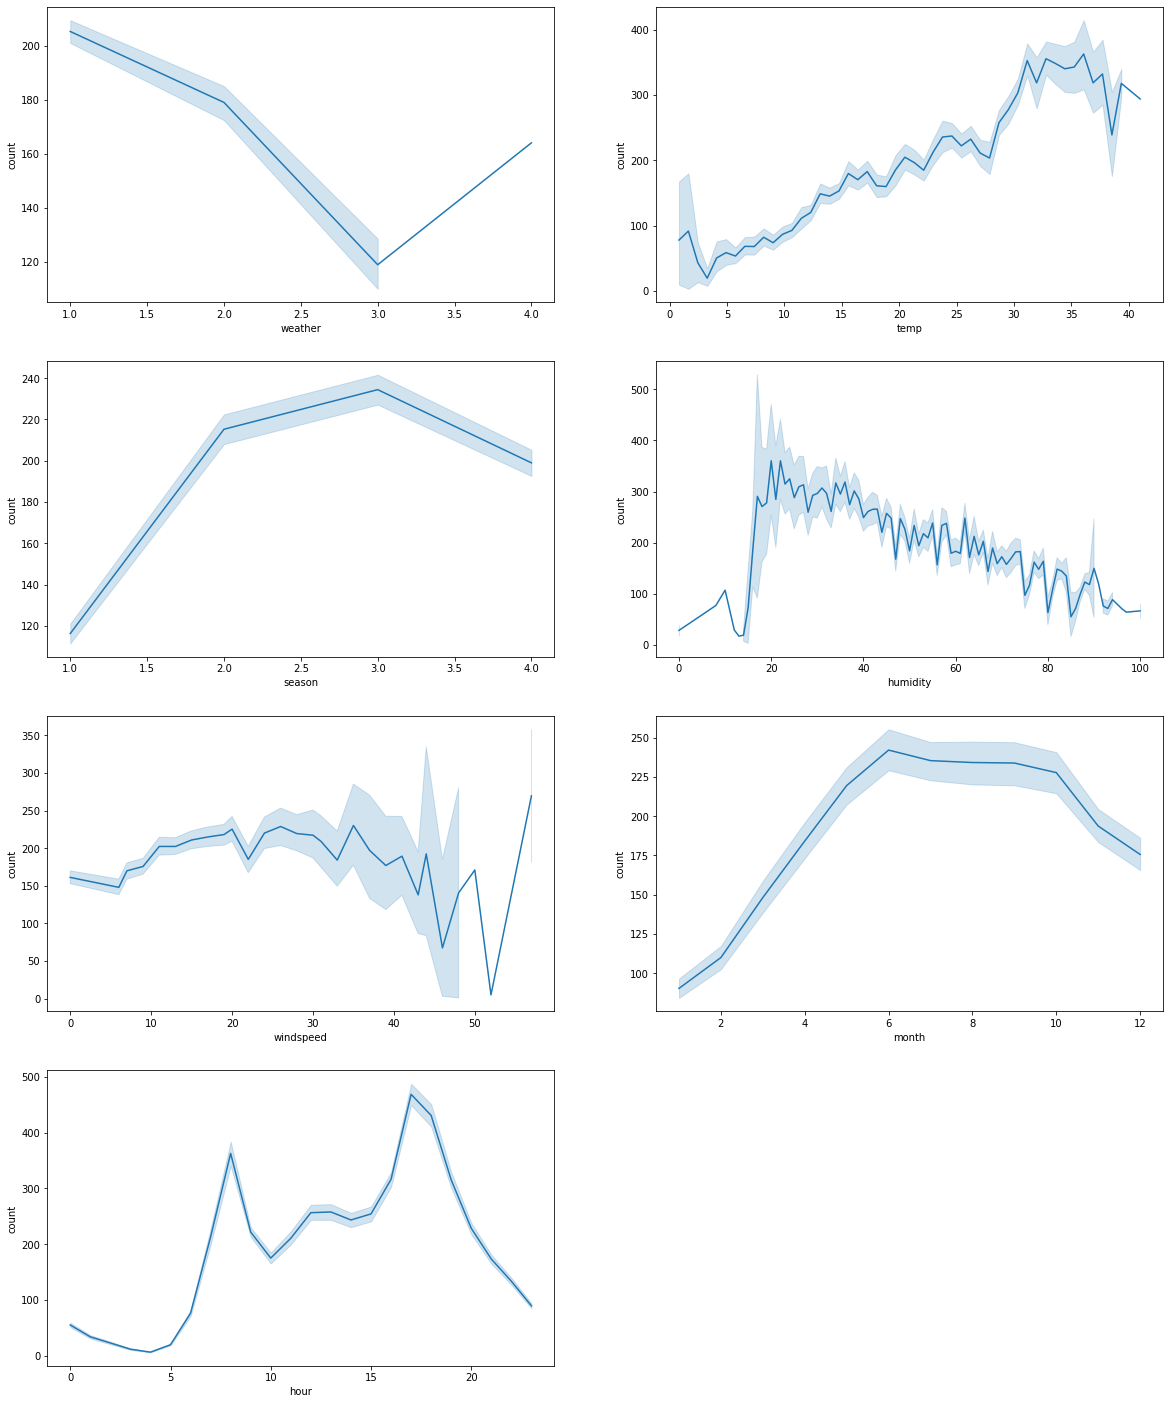

In [100]:
fig = plt.figure(figsize=(20,25))  
ax1 = fig.add_subplot(4,2,1)
ax2 = fig.add_subplot(4,2,2)
ax3 = fig.add_subplot(4,2,3)
ax4 = fig.add_subplot(4,2,4)
ax5 = fig.add_subplot(4,2,5)
ax6 = fig.add_subplot(4,2,6)
ax7 = fig.add_subplot(4,2,7)

sns.lineplot(x='weather',y='count',data=train, ax=ax1) # 날씨에 따른 대여회수
sns.lineplot(x='temp',y='count',data=train, ax=ax2) #온도에 따른 대여회수
sns.lineplot(x='season',y='count',data=train, ax=ax3) #계절에 따른 대여회수
sns.lineplot(x='humidity',y='count',data=train, ax=ax4) #습도에 따른 대여회수
sns.lineplot(x='windspeed',y='count',data=train, ax=ax5) #풍속에 따른 대여회수
sns.lineplot(x='month',y='count',data=train, ax=ax6) # 달에 따른 대여회수
sns.lineplot(x='hour',y='count',data=train, ax=ax7) #시간에 따른 대여회수

In [430]:
X = bike[['hour','month','season','temp','weather']].values  # 특성 데이터
y = bike['count'].values # 타깃 데이터

#시, 월, 계절, 온도, 날씨를 입력했을때 대여회수를 정답으로 맞히고자 함. 

In [431]:
# 훈련 데이터셋과 테스트 데이터셋으로 분리함.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [432]:
from sklearn.linear_model import LinearRegression #선형회귀 모델
model = LinearRegression()
model.fit(X_train, y_train) #훈련용 특성 데이터와 훈련용 타깃 데이터를 통해 모델이 학습함.
y_pred = model.predict( X_test ) # 모델이 테스트용 특성 데이터를 입력받아 정답을 예측함.

In [433]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred) # 실제 정답값과 예측값의 차이 정도를 구함.
mse

24241.178755144778

In [434]:
rmse = mse**0.5
rmse

155.69578913748688

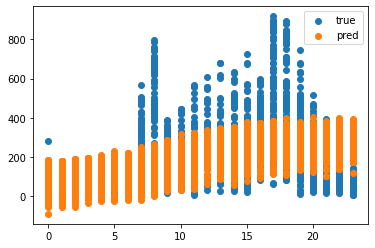

In [435]:
#시(hout)에 따른 대여회수
plt.scatter(X_test[:,0], y_test, label="true") # 실제 정답값
plt.scatter(X_test[:,0], y_pred, label="pred") # 모델이 예측한 값
plt.legend()
plt.show()

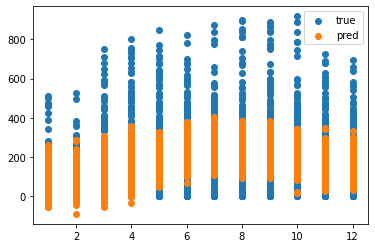

In [436]:
#월(month)에 따른 대여회수
plt.scatter(X_test[:,1], y_test, label="true") # 실제 정답값
plt.scatter(X_test[:,1], y_pred, label="pred") # 모델이 예측한 값
plt.legend()
plt.show()

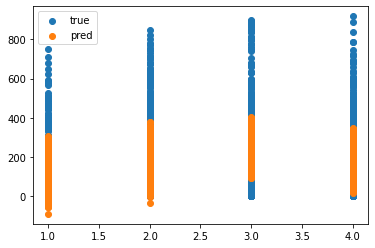

In [437]:
#계절(season)에 따른 대여회수
plt.scatter(X_test[:,2], y_test, label="true") # 실제 정답값
plt.scatter(X_test[:,2], y_pred, label="pred") # 모델이 예측한 값
plt.legend()
plt.show()

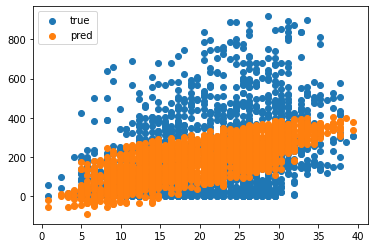

In [438]:
# 온도(temp)에 따른 대여회수
plt.scatter(X_test[:,3], y_test, label="true") # 실제 정답값
plt.scatter(X_test[:,3], y_pred, label="pred") # 모델이 예측한 값
plt.legend()
plt.show()

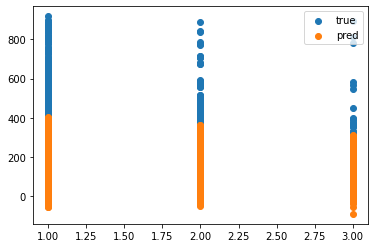

In [439]:
# 날씨(weather)에 따른 대여회수
plt.scatter(X_test[:,4], y_test, label="true") # 실제 정답값
plt.scatter(X_test[:,4], y_pred, label="pred") # 모델이 예측한 값
plt.legend()
plt.show()